<a href="https://colab.research.google.com/github/SumathiGit/Python-World/blob/main/Image_Recognition_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install torch

In [ ]:
import torch

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
from torchvision import datasets , transforms

In [ ]:
transform = transforms.Compose([transforms.Resize((28,28)),transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
training_dataset   = datasets.MNIST(root='./data',train=True, download= True, transform=transform)
validation_dataset = datasets.MNIST(root='./data',train=False, download= True, transform = transform) 

training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=100, shuffle=True)                             
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=100, shuffle = False)                                                                 #we will not training our validation_dataset that's why shuffle is false

In [ ]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()                                                                                           # change the above dataset into numpy array using tensor clone 
  image = image.transpose(1, 2, 0)                                                                                                  #the first dimension represent the color channel , 2nd and 3rd represents the width and height 1*28*28 To plot our image we need 28*28*1 so we use transpose
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)                                                                                                          #values outside the intervals clipped to the interval edges for example:values smaller than 0 becomes 0 values larger than 1 becomes 1
  return image

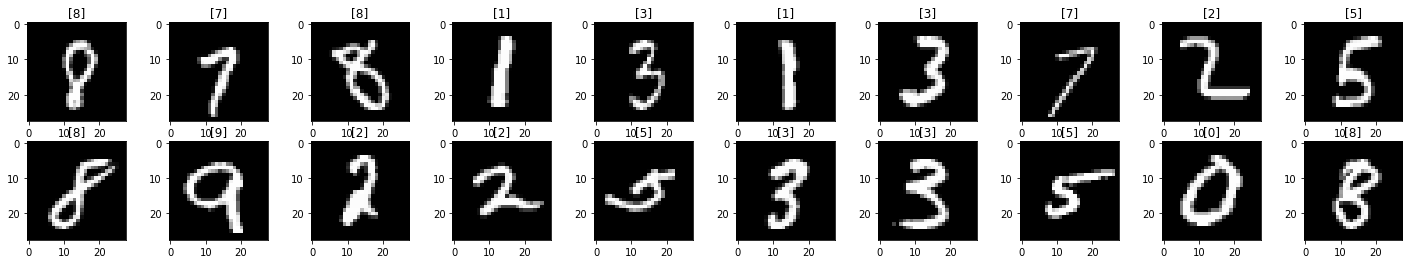

In [ ]:
dataiter = iter(training_loader)                                                                                               # training loader helps to partitioning the dataset into batches so we can epoch easily
images, labels = dataiter.next()                                                                                               #dataiter.next >> which gives the first batch of our trained data set and we assigining them as images and lables
fig = plt.figure(figsize=(25, 4))                                                                                              #width and height of the figure

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1)                                                                                           # no of rows,colums and index value
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])

In [ ]:
## Neural Network Implementation

In [ ]:
class Classifier(nn.Module):

    def __init__(self,     n_in, H1,      H2, D_out):                                                                        #For the two hidden layers we'll assign n_in for input nodes, D_out for output nodes
      super().__init__()
      self.linear1 = nn.Linear(n_in, H1)
      self.linear2 = nn.Linear(H1, H2)
      self.linear3 = nn.Linear(H2 , D_out)
    def forward(self, x):
      x = F.relu(self.linear1(x))
      x = F.relu(self.linear2(x))
      x = self.linear3(x)                                                                                                    #we are using Cross Enropy Loss for calculating the loss in multiclass dataset
      return x


In [ ]:
model = Classifier(784, 125, 65, 10)                                                                                         #Giving Dimensions for the in and out features
model 

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
epochs = 15
running_loss_history         = []                                                                                            #Analyzing the losses at every epoch with a plot
running_corrects_history     = []                                                                                            #Running loss history for the accuarcy measurement
val_running_loss_history     = []
val_running_corrects_history = []

for e in range(epochs):                                                                                                      #We are gonna iterate every epoch with the given batch of images by the training_loader

  running_loss = 0.0                                                                                                         #setting a varaible to keep track of the losses at every epoch before every iteration
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0  


  for inputs, labels in training_loader:                                                                                     #Here the inputs represents the images in our batch ... in next step we are gonna reshape them using view function
    inputs = inputs.view(inputs.shape[0],-1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)                                                                                        #Determining the loss by comparing the outputs to the input lables (batch by batch)
    optimizer.zero_grad()                                                                                                    #Before performing any training process we must set an optimizer
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs , 1)                                                                                        #since each image ouyput will be the collection of values with indices ranging from 0 to 9
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)


  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.view(val_inputs.shape[0], -1)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/ len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

epoch : 1
training loss: 0.9378, acc 77.6267 
validation loss: 0.4241, validation acc 88.4700 
epoch : 2
training loss: 0.3783, acc 89.3800 
validation loss: 0.3186, validation acc 91.0500 
epoch : 3
training loss: 0.3135, acc 90.9800 
validation loss: 0.2840, validation acc 92.0900 
epoch : 4
training loss: 0.2784, acc 91.9900 
validation loss: 0.2556, validation acc 92.4900 
epoch : 5
training loss: 0.2514, acc 92.7550 
validation loss: 0.2325, validation acc 93.3800 
epoch : 6
training loss: 0.2298, acc 93.4333 
validation loss: 0.2197, validation acc 93.7900 
epoch : 7
training loss: 0.2118, acc 93.8083 
validation loss: 0.2032, validation acc 94.1800 
epoch : 8
training loss: 0.1968, acc 94.3383 
validation loss: 0.1857, validation acc 94.5700 
epoch : 9
training loss: 0.1836, acc 94.7150 
validation loss: 0.1773, validation acc 94.8100 
epoch : 10
training loss: 0.1716, acc 95.0283 
validation loss: 0.1639, validation acc 95.0900 
epoch : 11
training loss: 0.1620, acc 95.3033 
va

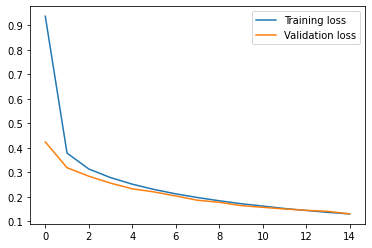

In [ ]:
plt.plot(running_loss_history, label = 'Training loss')
plt.plot(val_running_loss_history, label = 'Validation loss')
plt.legend()

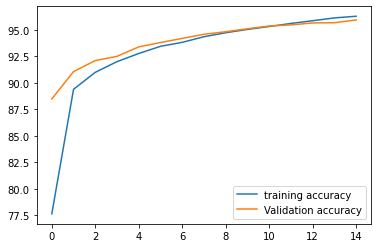

In [ ]:
plt.plot(running_corrects_history, label="training accuracy")
plt.plot(val_running_corrects_history, label="Validation accuracy")
plt.legend()

In [ ]:
# Testing the model using a image from the web >>> https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg

In [ ]:
#!pip3 install pillow==4.0.0

In [ ]:
import PIL.ImageOps                                                                                                                 #From pip pillow >> This library provides extensive file format support and adds image processing capabilities to your python interpretor

In [ ]:
import requests
url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream = True)
print(response)

<Response [200]>


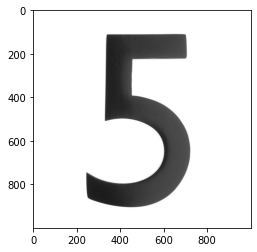

In [ ]:
import requests
from PIL import Image
url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream = True) 
img = Image.open(response.raw)
plt.imshow(img)

In [ ]:
#Should make the above image into 28*28 grayscale image like in the trained dataset

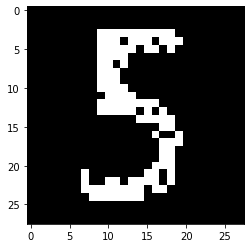

In [ ]:
img = PIL.ImageOps.invert(img)                                                                                           #invert is used for interchanging the color >> Here the plot color(white) interchanged with the image color(black)
img = img.convert('1')                                                                                                   #Converting the image into binary black and white image
img = transform(img)                                                                                                     #Transforming this image into the one that we are already having in our trained dataset
plt.imshow(im_convert(img))

In [ ]:
img = img.view(img.shape[0], -1)                                                                                                   #Asking our model to make prediction according to our input image (5)
output = model(img)
_, pred = torch.max(output, 1)
print(pred.item())

5


In [ ]:
#We are going to use the same code for displaying a grid of images with our predicted output

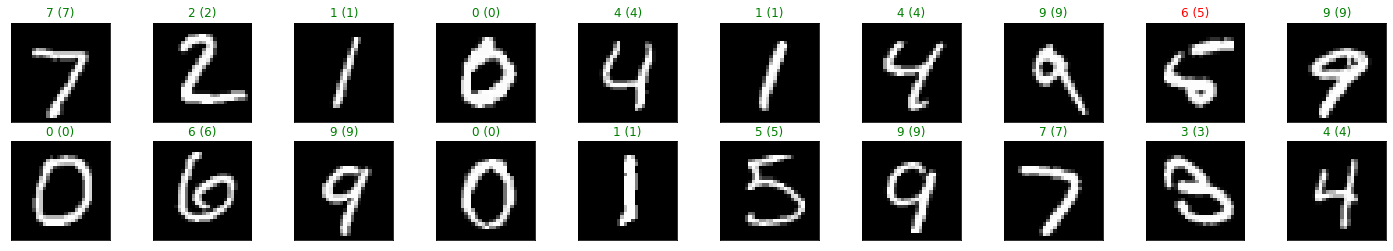

In [ ]:
dataiter = iter(validation_loader)                                                                                                        #using a batch of images from a validation loader coz they are not trained images >> from the validation_dataset
images, labels = dataiter.next()                 
images_ = images.view(images.shape[0], -1)                                                                                                      #Reshape them in order to view  
output = model(images_)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx]==labels[idx] else "red"))